In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm  # Import norm for the cumulative distribution function
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


dataset_path = r"..\datasets\btc_options_data\european_btc_calls.csv"

euro_options = pd.read_csv(dataset_path)

euro_options.columns

,UNDERLYING_PRICE,STRIKE,DTE,OPTION_RIGHT,MARK_IV,BID_PRICE,ASK_PRICE,QUOTE_DATE,EXPIRY_DATE,DELTA,GAMMA,VEGA,THETA,RHO,MID_PRICE,MONEYNESS,ASK_USD,BID_USD,NEGOTIATED_PRICE
0,58529.2644,53000.0,0.16657,call,77.88,0.0920,0.0960,2024-09-01,2024-09-01,1.00000,0.00000,0.00000,-0.00001,0.25108,0.09400,1.104326,5618.809382,5384.692325,5501.750854
1,58529.2644,54000.0,0.16657,call,69.47,0.0750,0.0790,2024-09-01,2024-09-01,1.00000,0.00000,0.00000,-0.00009,0.25171,0.07700,1.083875,4623.811888,4389.694830,4506.753359
2,58529.2644,55000.0,0.16657,call,69.47,0.0585,0.0620,2024-09-01,2024-09-01,0.99999,0.00000,0.00081,-0.02799,0.25323,0.06025,1.064168,3628.814393,3423.961967,3526.388180
3,58529.2644,56000.0,0.16657,call,69.45,0.0415,0.0450,2024-09-01,2024-09-01,0.99852,0.00001,0.06055,-2.10252,0.25744,0.04325,1.045165,2633.816898,2428.964473,2531.390685
4,58529.2644,56500.0,0.16657,call,66.20,0.0320,0.0365,2024-09-01,2024-09-01,0.99363,0.00002,0.22510,-7.45131,0.25842,0.03425,1.035916,2136.318151,1872.936461,2004.627306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13060,70333.0500,130000.0,361.16663,call,64.47,0.0735,0.0790,2024-09-30,2025-09-26,0.26199,0.00001,227.82796,-20.33443,129.31959,0.07625,0.541023,5556.310950,5169.479175,5362.895062
13061,70333.3100,140000.0,361.16663,call,65.08,0.0625,0.0675,2024-09-30,2025-09-26,0.22973,0.00001,212.29949,-19.12644,114.57369,0.06500,0.502381,4747.498425,4395.831875,4571.665150
13062,70333.3100,160000.0,361.16663,call,66.34,0.0465,0.0515,2024-09-30,2025-09-26,0.17996,0.00001,183.55778,-16.85862,91.15581,0.04900,0.439583,3622.165465,3270.498915,3446.332190
13063,70333.3100,180000.0,361.16663,call,67.69,0.0360,0.0410,2024-09-30,2025-09-26,0.14483,0.00000,159.33836,-14.93227,74.12420,0.03850,0.390741,2883.665710,2531.999160,2707.832435


In [9]:
from scipy.stats import norm  # Import the normal distribution for cumulative density function (CDF)

# Define the Black-Scholes Model class
class BlackScholesModel:
    def __init__(self, S, K, T, r, sigma):
        self.S = S        # Underlying asset price
        self.K = K        # Option strike price
        self.T = T        # Time to expiration in years
        self.r = r        # Risk-free interest rate
        self.sigma = sigma  # Volatility of the underlying asset

    def d1(self):
        return (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))
    
    def d2(self):
        return self.d1() - self.sigma * np.sqrt(self.T)
    
    def call_option_price(self):
        return (self.S * norm.cdf(self.d1()) - self.K * np.exp(-self.r * self.T) * norm.cdf(self.d2()))
    
    def put_option_price(self):
        return (self.K * np.exp(-self.r * self.T) * norm.cdf(-self.d2()) - self.S * norm.cdf(-self.d1()))

# Parameters for Black-Scholes calculation
risk_free_rate = 0.04  # Risk-free rate, e.g., 1-year treasury rate

# Compute parameters for Black-Scholes model
euro_options['BS_PRICE'] = euro_options.apply(
    lambda row: BlackScholesModel(
        S=row['UNDERLYING_PRICE'],
        K=row['STRIKE'],
        T=row['DTE'],  # Convert days to years
        r=risk_free_rate,
        sigma=row['MARK_IV']  # Use implied volatility
    ).call_option_price(),
    axis=1
)

# Display the updated DataFrame
print(euro_options[['BS_PRICE']], "\n")


         BS_PRICE
0      58529.2644
1      58529.2644
2      58529.2644
3      58529.2644
4      58529.2644
...           ...
13060  70333.0500
13061  70333.3100
13062  70333.3100
13063  70333.3100
13064  70333.3100

[13065 rows x 1 columns] 



In [10]:
# ------------------- Metrics Calculation ------------------- #
def calculate_metrics(df, actual_col, predicted_col):
    """
    Calculate evaluation metrics for a model's predictions.
    
    Parameters:
        df (DataFrame): Dataset containing actual and predicted values.
        actual_col (str): Column name for actual option prices.
        predicted_col (str): Column name for predicted option prices.
    
    Returns:
        dict: Dictionary of calculated metrics.
    """
    # Filter out rows where actual values are 0 to avoid division by zero
    filtered_df = df[df[actual_col] != 0]
    
    y_true = filtered_df[actual_col]
    y_pred = filtered_df[predicted_col]

    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    bias = np.median((y_pred - y_true) / y_true) * 100  # Median percent error

    # Percentage Errors within thresholds
    pe5 = np.mean(np.abs((y_true - y_pred) / y_true) <= 0.05) * 100
    pe10 = np.mean(np.abs((y_true - y_pred) / y_true) <= 0.10) * 100
    pe20 = np.mean(np.abs((y_true - y_pred) / y_true) <= 0.20) * 100

    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return {
        "RMSE": np.sqrt(mse),
        "MAE": mae,
        "Bias": bias,
        "PE5 (%)": pe5,
        "PE10 (%)": pe10,
        "PE20 (%)": pe20,
        "MAPE (%)": mape,
    }

# ------------------- Example Usage ------------------- #
# Calculate metrics
metrics = calculate_metrics(euro_options, actual_col="MID_PRICE", predicted_col="BS_PRICE")

# Display Results
metrics_df = pd.DataFrame([metrics])

print("Black-Scholes Model Metrics (Calls):")
print(metrics_df)


Black-Scholes Model Metrics (Calls):
           RMSE           MAE          Bias  PE5 (%)  PE10 (%)  PE20 (%)  \
0  61035.356881  60917.624487  1.236260e+08      0.0       0.0       0.0   

       MAPE (%)  
0  9.469206e+09  


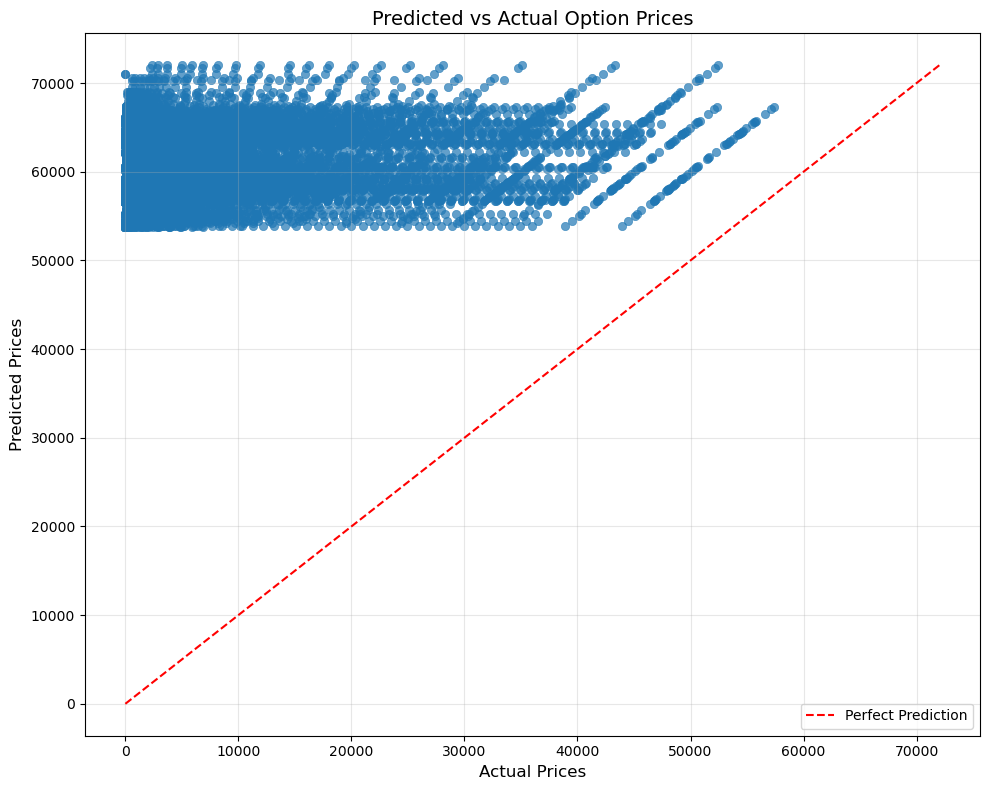

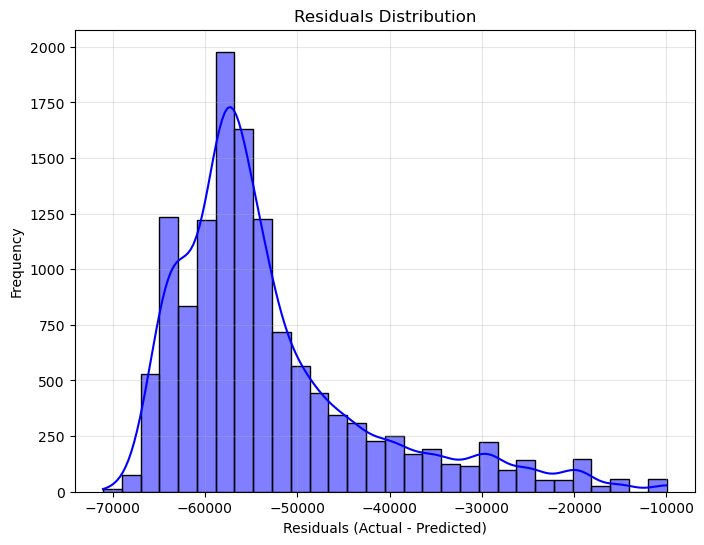

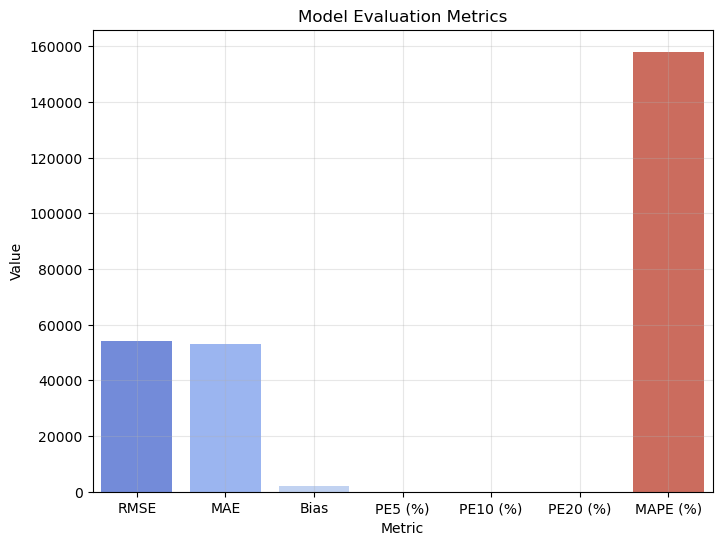

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------- Plotting Functions ------------------- #
def plot_predictions_vs_actual(df, actual_col, predicted_col):
    """
    Plot the predicted option prices against actual prices.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing actual and predicted prices
    actual_col : str
        Name of the column with actual prices
    predicted_col : str
        Name of the column with predicted prices
    """
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=actual_col, y=predicted_col, data=df, alpha=0.7, edgecolor=None)
    
    min_val = min(df[actual_col].min(), df[predicted_col].min())
    max_val = max(df[actual_col].max(), df[predicted_col].max())
    plt.plot([min_val, max_val], [min_val, max_val], 
             color="red", linestyle="--", label="Perfect Prediction")
    
    plt.title("Predicted vs Actual Option Prices", fontsize=14)
    plt.xlabel("Actual Prices", fontsize=12)
    plt.ylabel("Predicted Prices", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
def plot_residuals(df, actual_col, predicted_col):
    """
    Plot the residuals (errors) of the predictions.
    """
    residuals = df[actual_col] - df[predicted_col]
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, color="blue", bins=30)
    plt.title("Residuals Distribution")
    plt.xlabel("Residuals (Actual - Predicted)")
    plt.ylabel("Frequency")
    plt.grid(alpha=0.3)
    plt.show()

def plot_metrics(metrics_dict):
    """
    Visualize metrics using a bar plot.
    """
    metrics_df = pd.DataFrame([metrics_dict])
    metrics_df = metrics_df.melt(var_name="Metric", value_name="Value")
    
    plt.figure(figsize=(8, 6))
    sns.barplot(data=metrics_df, x="Metric", y="Value", palette="coolwarm")
    plt.title("Model Evaluation Metrics")
    plt.ylabel("Value")
    plt.grid(alpha=0.3)
    plt.show()


# Plot predicted vs actual prices
plot_predictions_vs_actual(euro_options, actual_col="NEGOTIATED_PRICE", predicted_col="BS_PRICE")

# Plot residuals
plot_residuals(euro_options, actual_col="NEGOTIATED_PRICE", predicted_col="BS_PRICE")

# Plot metrics
plot_metrics(metrics)


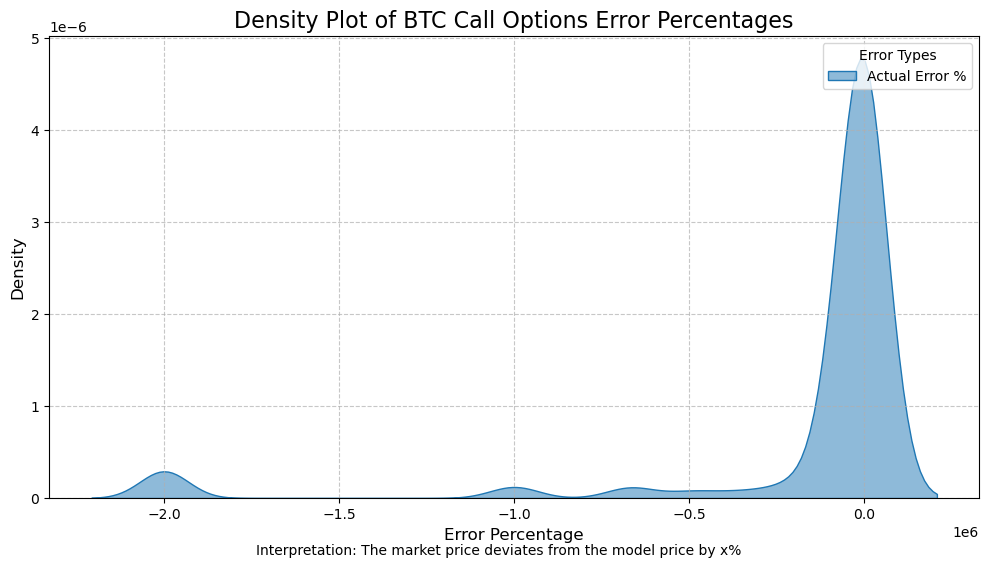

In [5]:
btc_call_options = euro_options.copy()

# Calculate errors with safety checks
btc_call_options["Actual Error %"] = (
    (btc_call_options["NEGOTIATED_PRICE"] - btc_call_options["BS_PRICE"]) 
    / btc_call_options["NEGOTIATED_PRICE"]
) * 100

# Remove infinite and NaN values
btc_call_options = btc_call_options[
    np.isfinite(btc_call_options["Actual Error %"])]

# Set up the plot
plt.figure(figsize=(12, 6))

# Create density plots
sns.kdeplot(data=btc_call_options, x="Actual Error %", label="Actual Error %", fill=True, alpha=0.5)

# Customize the plot
plt.title("Density Plot of BTC Call Options Error Percentages", fontsize=16)
plt.xlabel("Error Percentage", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Error Types")
plt.grid(True, linestyle='--', alpha=0.7)
plt.figtext(0.5, 0.01, 'Interpretation: The market price deviates from the model price by x%', ha='center', va='bottom', fontsize=10)
plt.show()

In [6]:
btc_call_options.describe()

,UNDERLYING_PRICE,STRIKE,DTE,MARK_IV,BID_PRICE,ASK_PRICE,DELTA,GAMMA,VEGA,THETA,RHO,MID_PRICE,MONEYNESS,ASK_USD,BID_USD,NEGOTIATED_PRICE,BS_PRICE,Actual Error %
count,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,13062.000000,1.306200e+04
mean,60917.753972,71213.060787,61.561799,69.324150,0.127821,0.131101,0.483877,0.000028,43.806626,-34.333766,31.902166,0.129461,1.080675,8060.255186,7857.312933,7958.784060,60917.753948,-1.580498e+05
std,3789.335096,40622.530658,77.535504,22.485903,0.174979,0.177532,0.385247,0.000064,51.874885,44.134353,45.783533,0.176194,0.621065,10961.301086,10797.260878,10875.291093,3789.335081,4.607143e+05
min,53809.202200,10000.000000,0.166280,23.320000,0.000000,0.000000,0.000000,0.000000,0.000000,-395.008390,0.000000,0.000050,0.183465,0.000000,0.000000,2.690483,53809.202200,-1.999900e+06
25%,57943.980000,52000.000000,6.166480,56.960000,0.004700,0.005500,0.072660,0.000000,3.652017,-41.326538,1.365322,0.005100,0.792399,319.023719,282.005802,301.102717,57943.980000,-1.950784e+04
50%,60503.430000,62000.000000,30.166670,63.020000,0.048250,0.050500,0.467065,0.000010,22.973470,-22.826405,11.151065,0.049500,0.976891,3073.492220,2913.897742,2989.531700,60503.430000,-1.920202e+03
75%,64170.630000,76000.000000,90.166640,74.210000,0.181375,0.186500,0.900335,0.000030,69.662423,-7.749837,46.223380,0.183500,1.170740,11456.515001,11142.183239,11281.762796,64170.630000,-4.449591e+02
max,72009.890000,300000.000000,364.166500,207.400000,0.850500,0.853500,1.000000,0.001180,286.182740,0.000000,305.258000,0.852000,6.734737,57480.980295,57278.938185,57379.959240,72009.890000,-1.737089e+01
